In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 20) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [3]:
display(students.head(20))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
students.info()   # Ознакомляемся с данными. числовые столбцы - 13, строковые столбцы - 17.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
pd.DataFrame(students.school.value_counts(dropna=False)) # Проверяем данные в каждом столбце.

,school
GP,349
MS,46


In [7]:
pd.DataFrame(students.sex.value_counts(dropna=False))

,sex
F,208
M,187


In [8]:
pd.DataFrame(students.age.value_counts(dropna=False)) # В возрасте 16 лет больше всего.

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

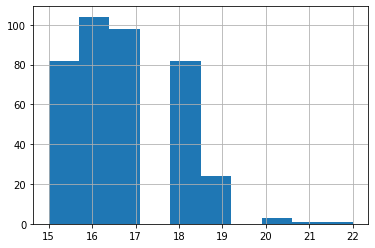

In [9]:
students.age.hist()  # Проверяем выбросы.
students.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


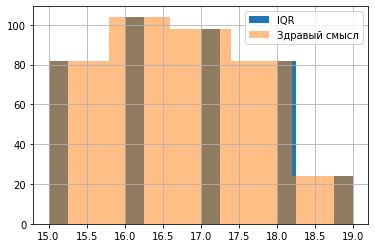

In [10]:
IQR = students.age.quantile(0.75) - students.age.quantile(0.25)
perc25 = students.age.quantile(0.25)
perc75 = students.age.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.age.loc[students.age.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (15, 19), label = 'IQR')
 
students.age.loc[students.age <= 19].hist(
alpha = 0.5, bins = 5, range = (15, 19), label = 'Здравый смысл')
 
plt.legend();

In [11]:
pd.DataFrame(students.address.value_counts(dropna=False)) # В городе живетбольше учеников.
students.address.value_counts() # Убрать все NaN.

U    295
R     83
Name: address, dtype: int64

In [12]:
pd.DataFrame(students.Pstatus.value_counts(dropna=False))  # С родителями живет больше учеников.
pd.DataFrame(students.Pstatus.value_counts()) # Убрать все NaN.

,Pstatus
T,314
A,36


In [13]:
pd.DataFrame(students.Medu.value_counts(dropna=False))  # У большенства матерей высшее образование.
pd.DataFrame(students.Medu.value_counts()) # Убрать все NaN.

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<AxesSubplot:>

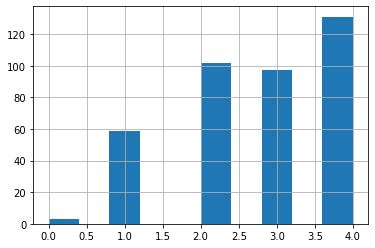

In [14]:
students.Medu.hist() # Проверяем выбросы

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


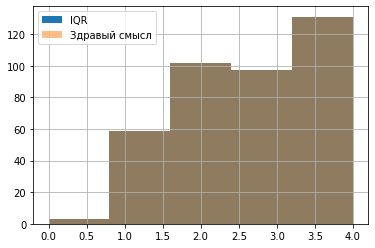

In [15]:
IQR = students.Medu.quantile(0.75) - students.Medu.quantile(0.25)
perc25 = students.Medu.quantile(0.25)
perc75 = students.Medu.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.Medu.loc[students.Medu.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 4), label = 'IQR')
 
students.Medu.loc[students.Medu <= 4].hist(
alpha = 0.5, bins = 5, range = (0, 4), label = 'Здравый смысл')
 
plt.legend();

In [16]:
pd.DataFrame(students.Fedu.value_counts())  # У большенства отцов 5-9 классы.
students.Fedu = students.Fedu.apply(lambda x: 4.0 if x == 40.0 else x) #Исправление опечатки 40.0 в 4.0.
pd.DataFrame(students.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

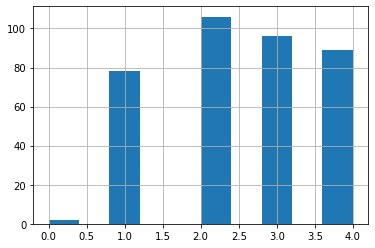

In [17]:
students.Fedu.hist()  # Проверяем выбросы.
students.Fedu.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


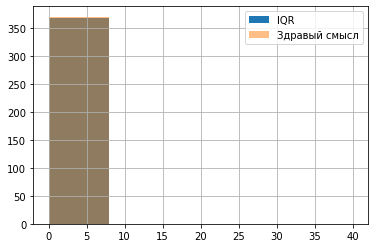

In [18]:
IQR = students.Fedu.quantile(0.75) - students.Fedu.quantile(0.25)
perc25 = students.Fedu.quantile(0.25)
perc75 = students.Fedu.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.Fedu.loc[students.Fedu.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 40), label = 'IQR')
 
students.Fedu.loc[students.Fedu <= 40].hist(
alpha = 0.5, bins = 5, range = (0, 40), label = 'Здравый смысл')
 
plt.legend();

In [19]:
pd.DataFrame(students.Mjob.value_counts())  # У большенства работа матери "other".

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [20]:
pd.DataFrame(students.Fjob.value_counts())  # У большенства работа отцов "other".

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


In [21]:
pd.DataFrame(students.reason.value_counts()) # У большенства причина выбора школы "образовательная программа".

,reason
course,137
home,104
reputation,103
other,34


In [22]:
pd.DataFrame(students.guardian.value_counts()) # У большенства омекун мама.

,guardian
mother,250
father,86
other,28


In [23]:
pd.DataFrame(students.traveltime.value_counts()) # У большенства время в пути до школы меньше 15 мин.

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

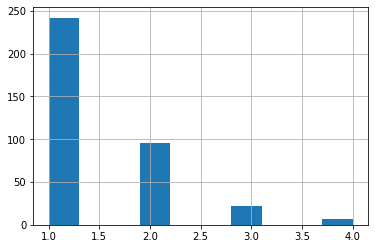

In [24]:
students.traveltime.hist() # Проверяем выбросы.
students.traveltime.describe()

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


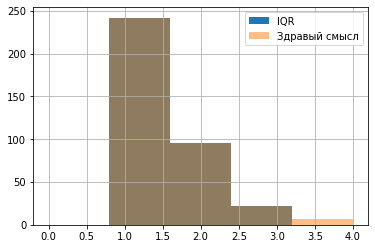

In [25]:
IQR = students.traveltime.quantile(0.75) - students.traveltime.quantile(0.25)
perc25 = students.traveltime.quantile(0.25)
perc75 = students.traveltime.quantile(0.75)

print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.traveltime.loc[students.traveltime.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 4), label = 'IQR')
 
students.traveltime.loc[students.traveltime <= 4].hist(
alpha = 0.5, bins = 5, range = (0, 4), label = 'Здравый смысл')
 
plt.legend();

In [26]:
pd.DataFrame(students.studytime.value_counts())  # У большенства время на учёбу помимо школы в неделю 2-5 часов.

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

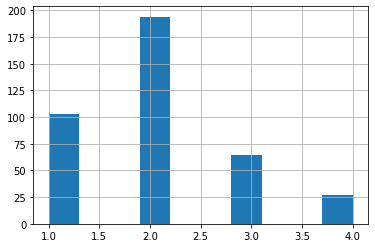

In [27]:
students.studytime.hist()  # Проверяем выбросы.
students.studytime.describe()

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


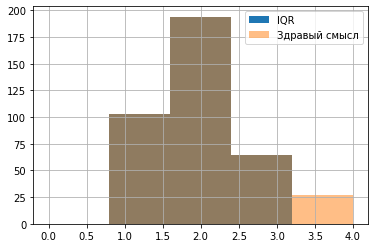

In [28]:
IQR = students.studytime.quantile(0.75) - students.studytime.quantile(0.25)
perc25 = students.studytime.quantile(0.25)
perc75 = students.studytime.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.studytime.loc[students.studytime.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 4), label = 'IQR')
 
students.studytime.loc[students.studytime <= 4].hist(
alpha = 0.5, bins = 5, range = (0, 4), label = 'Здравый смысл')
 
plt.legend();

In [29]:
pd.DataFrame(students.failures.value_counts())  # У большенства учеников Количество внеучебных неудач 'о', '<3'.

,failures
0.0,293
1.0,49
2.0,16
3.0,15


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

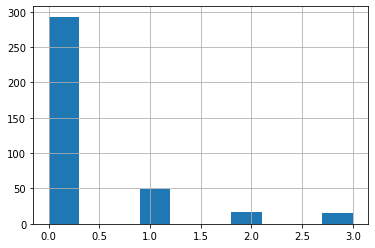

In [30]:
students.failures.hist()  # 1,2,3 - выбросы.
students.failures.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


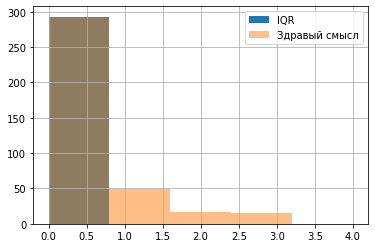

In [31]:
IQR = students.failures.quantile(0.75) - students.failures.quantile(0.25)
perc25 = students.failures.quantile(0.25)
perc75 = students.failures.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.failures.loc[students.failures.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 4), label = 'IQR')
 
students.failures.loc[students.failures <= 4].hist(
alpha = 0.5, bins = 5, range = (0, 4), label = 'Здравый смысл')
 
plt.legend();

In [32]:
pd.DataFrame(students.schoolsup.value_counts()) # Больше с учеников без дополнительной образовательной поддержки.

,schoolsup
no,335
yes,51


In [33]:
pd.DataFrame(students.famsup.value_counts())  # Больше с учеников с семейной образовательной поддержкой.

,famsup
yes,219
no,137


In [34]:
pd.DataFrame(students.paid.value_counts())  # Больше с учеников с дополнительными платными занятиямипо математике.

,paid
no,200
yes,155


In [35]:
pd.DataFrame(students.activities.value_counts())  # Больше с учеников с дополнительными внеучебными занятиями.

,activities
yes,195
no,186


In [36]:
pd.DataFrame(students.nursery.value_counts())  # Больше учеников посещали деский сад.

,nursery
yes,300
no,79


In [37]:
pd.DataFrame(students.higher.value_counts())  # Большенство  хочет получить высшее образование.

,higher
yes,356
no,19


In [39]:
pd.DataFrame(students.internet.value_counts()) # У большенства есть интернет дома.

,internet
yes,305
no,56


In [41]:
pd.DataFrame(students.romantic.value_counts())  # У большенства есть романтические отношения.

,romantic
no,240
yes,124


In [44]:
pd.DataFrame(students.famrel.value_counts(dropna=False))  # У большенства хорошее семейное отношениена.
students.famrel = students.famrel.apply(lambda x: 1 if x == -1 else x) # Замена -1 на 1, скорее опечатка.
students.famrel = students.famrel.apply(lambda x: students.famrel.median() if pd.isna(x) else x) # Замена NaN на median.
pd.DataFrame(students.famrel.value_counts(dropna=False))

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


count    395.000000
mean       3.946835
std        0.872425
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

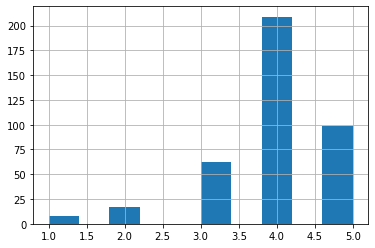

In [45]:
students.famrel.hist()  # Проверить выбросы. -1, 1, 2 выбросы
students.famrel.describe()

25-й перцентиль: 4.0, 75-й перцентиль: 4.5, IQR: 0.5,  Границы выбросов: [3.25, 5.25].


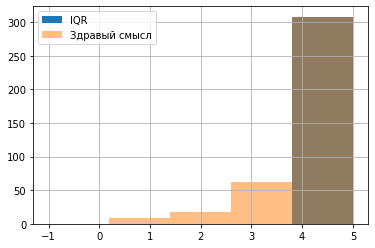

In [48]:
IQR = students.famrel.quantile(0.75) - students.famrel.quantile(0.25)
perc25 = students.famrel.quantile(0.25)
perc75 = students.famrel.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.famrel.loc[students.famrel.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (-1, 5), label = 'IQR')
 
students.famrel.loc[students.famrel <= 5].hist(
alpha = 0.5, bins = 5, range = (-1, 5), label = 'Здравый смысл')
 
plt.legend();

In [49]:
pd.DataFrame(students.freetime.value_counts())  # Больше учеников с нормальным свободным временем.

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

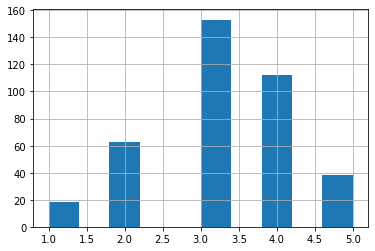

In [50]:
students.freetime.hist()  # Проверить выбросы. '1' выброс.Проверить выбросы
students.freetime.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


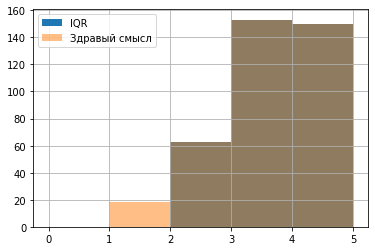

In [51]:
IQR = students.freetime.quantile(0.75) - students.freetime.quantile(0.25)
perc25 = students.freetime.quantile(0.25)
perc75 = students.freetime.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.freetime.loc[students.freetime.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 5), label = 'IQR')
 
students.freetime.loc[students.freetime <= 5].hist(
alpha = 0.5, bins = 5, range = (0, 5), label = 'Здравый смысл')
 
plt.legend();

In [52]:
pd.DataFrame(students.goout.value_counts())  # Больше учеников проводят умеренно время с друзьями.

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

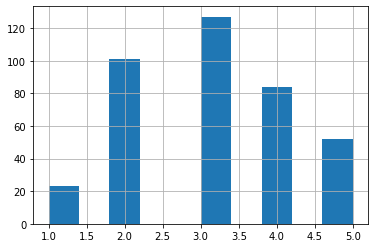

In [53]:
students.goout.hist()  # Проверить выбросы.
students.goout.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


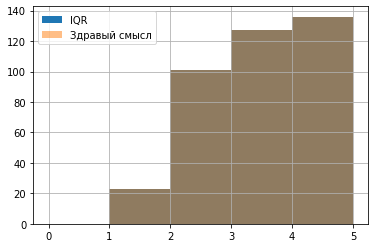

In [54]:
IQR = students.goout.quantile(0.75) - students.goout.quantile(0.25)
perc25 = students.goout.quantile(0.25)
perc75 = students.goout.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.goout.loc[students.goout.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 5), label = 'IQR')
 
students.goout.loc[students.goout <= 5].hist(
alpha = 0.5, bins = 5, range = (0, 5), label = 'Здравый смысл')
 
plt.legend();

In [55]:
pd.DataFrame(students.health.value_counts())  # Больше учеников с отличным здоровьем.

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

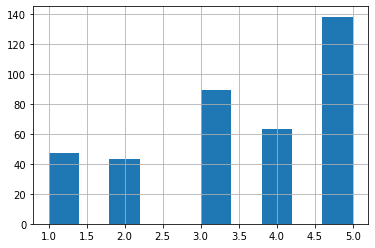

In [58]:
students.health.hist()  # Проверить выбросы.
students.health.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


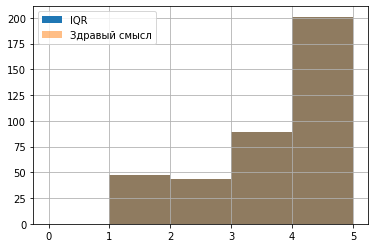

In [59]:
IQR = students.health.quantile(0.75) - students.health.quantile(0.25)
perc25 = students.health.quantile(0.25)
perc75 = students.health.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.health.loc[students.health.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 5), label = 'IQR')
 
students.health.loc[students.health <= 5].hist(
alpha = 0.5, bins = 5, range = (0, 5), label = 'Здравый смысл')
 
plt.legend();

In [62]:
display(pd.DataFrame(students.absences.value_counts()))  # Большество учеников не имеют пропусков.
print("Значений, встретившихся в столбце более 10 раз:"
      , (students.absences.value_counts()>10).sum())
students.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
...,...
38.0,1
40.0,1
23.0,1
17.0,1


Значений, встретившихся в столбце более 10 раз: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

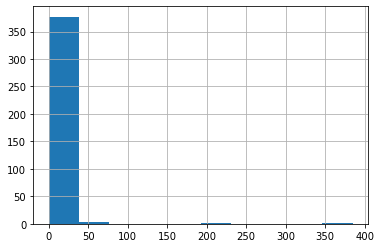

In [63]:
students.absences.hist()  # Проверить выбросы. Больше '20', выбросы.
students.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


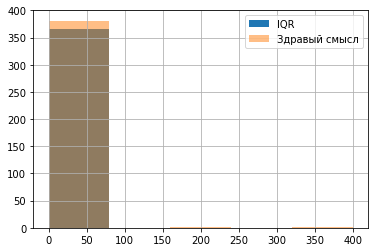

In [65]:
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.absences.loc[students.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 400), label = 'IQR')
 
students.absences.loc[students.absences <= 400].hist(
alpha = 0.5, bins = 5, range = (0, 400), label = 'Здравый смысл')
 
plt.legend();

In [68]:
display(pd.DataFrame(students.score.value_counts()))  # С баллом '50' больше учеников.

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

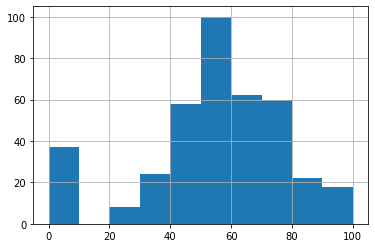

In [69]:
students.score.hist()  # Проверить выбросы, '0' выброс.
students.score.describe() 

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


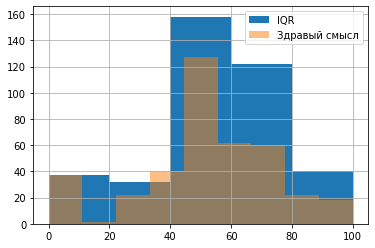

In [72]:
IQR = students.score.quantile(0.75) - students.score.quantile(0.25)
perc25 = students.score.quantile(0.25)
perc75 = students.score.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.score.loc[students.score.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 100), label = 'IQR')
 
students.score.loc[students.score <= 100].hist(
alpha = 0.5, bins = 9, range = (0, 100), label = 'Здравый смысл')
 
plt.legend();

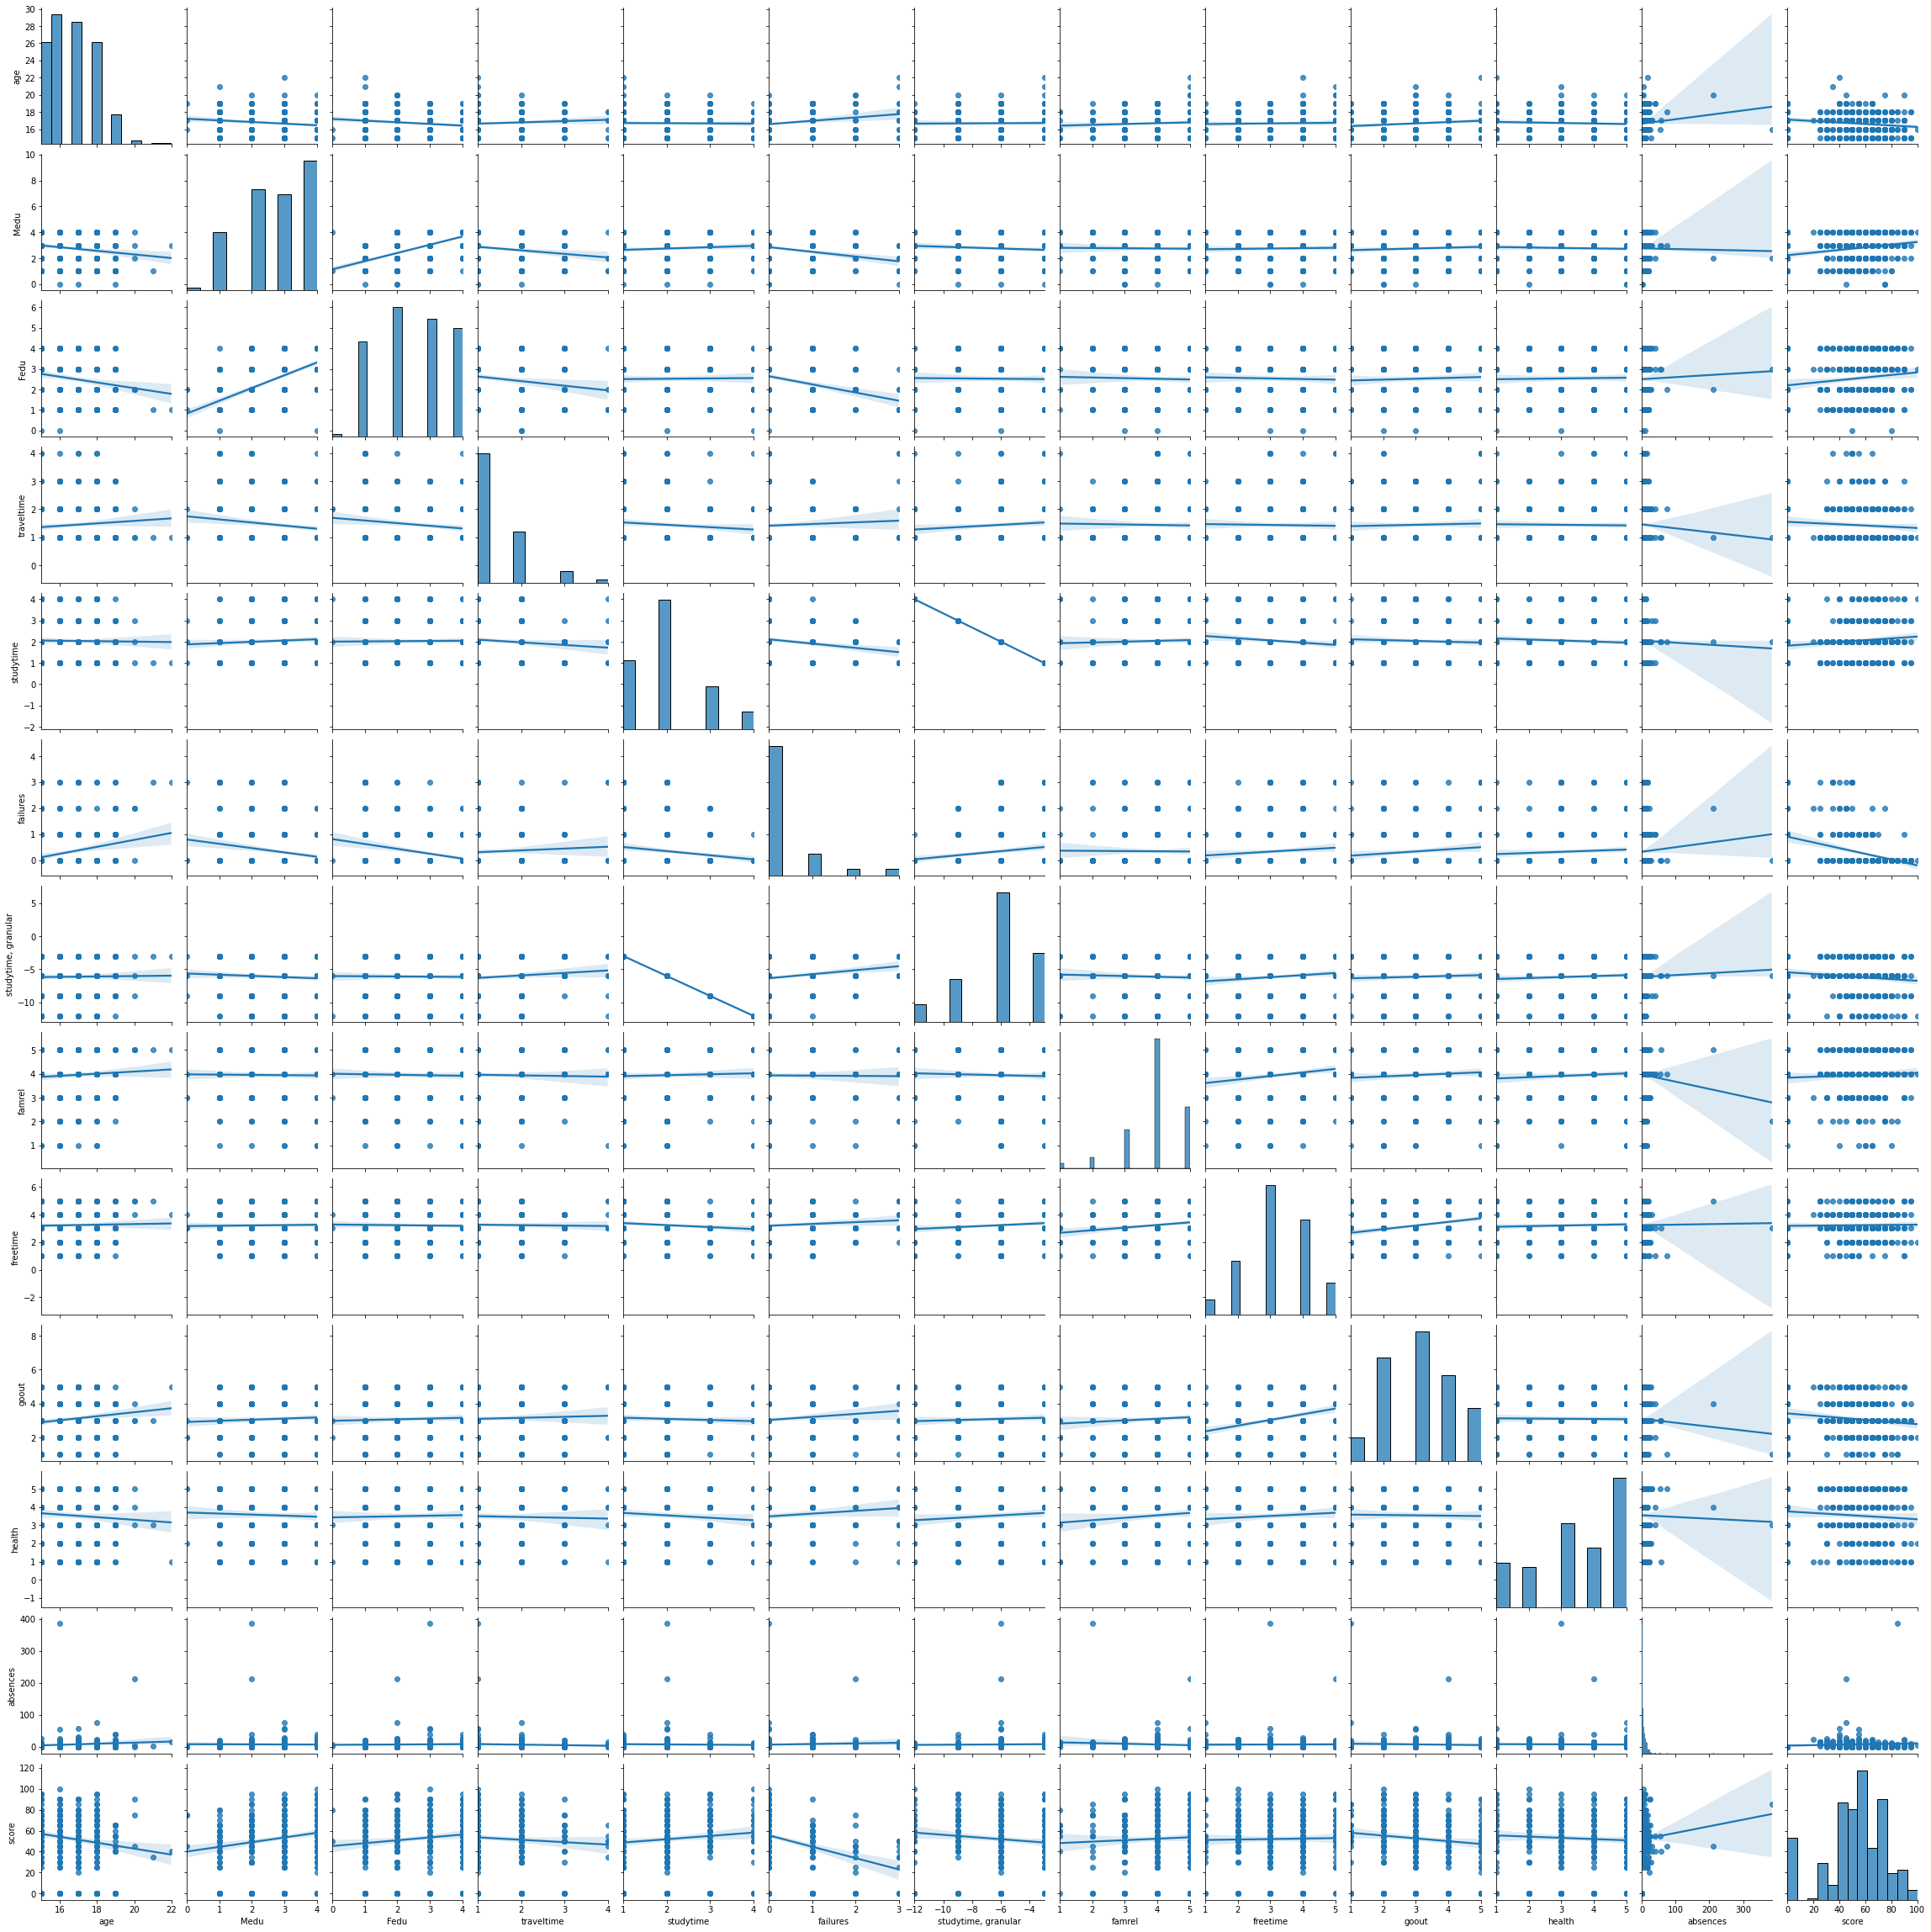

In [73]:
sns.pairplot(students, kind = 'reg')

In [74]:
students.corr() # Нет полной корреляции между какими-либо столбцами. Не буду опускать ни одного.

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.015556,0.065250,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.078589,-0.014009,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.012896,-0.025702,-0.025892,0.042663,0.023862,0.022572,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,0.102206,-0.021297,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,-1.000000,0.038152,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.178992,-0.009241,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.012896,0.102206,-1.000000,0.178992,1.000000,-0.038152,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.065250,-0.014009,-0.025702,-0.021297,0.038152,-0.009241,-0.038152,1.000000,0.167420,0.073841,0.084233,-0.081882,0.052902
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.121969,0.167420,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.051280,0.073841,0.296437,1.000000,-0.015608,-0.048738,-0.129685


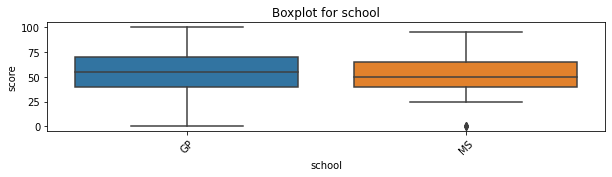

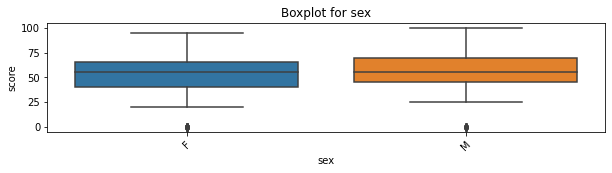

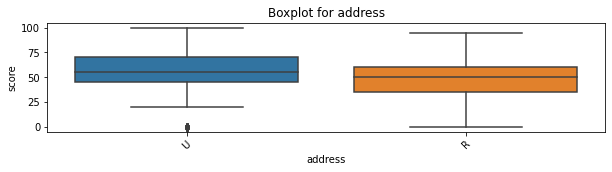

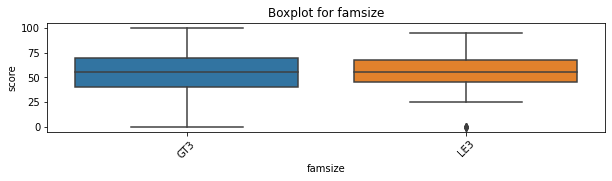

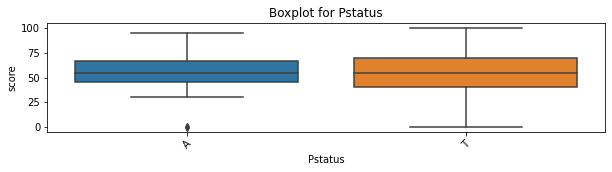

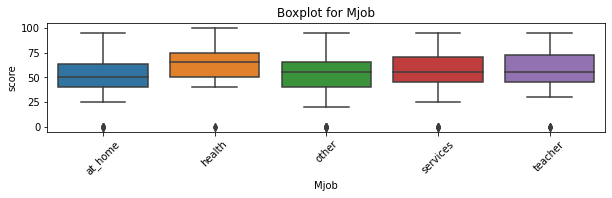

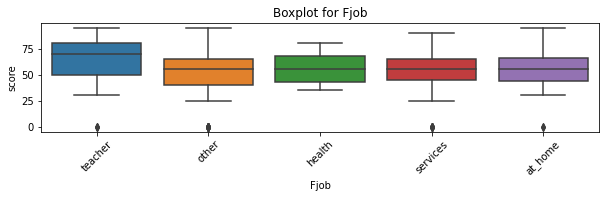

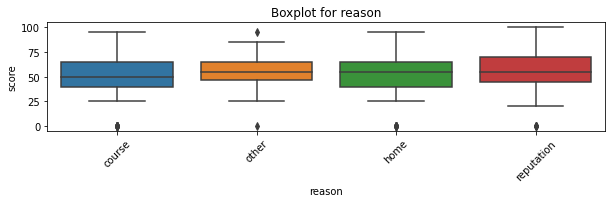

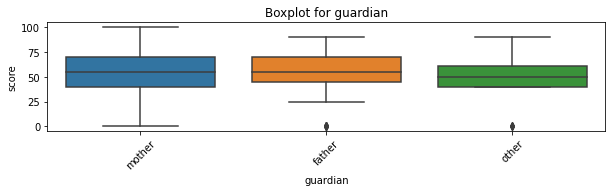

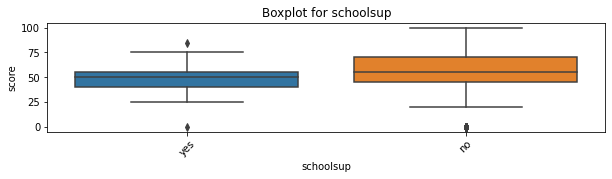

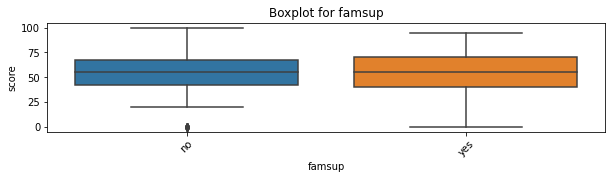

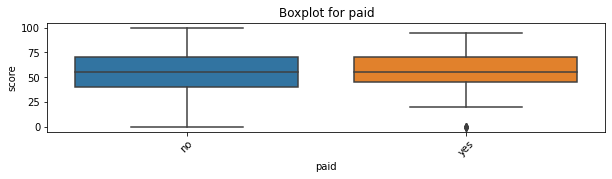

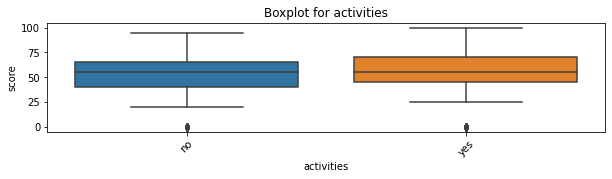

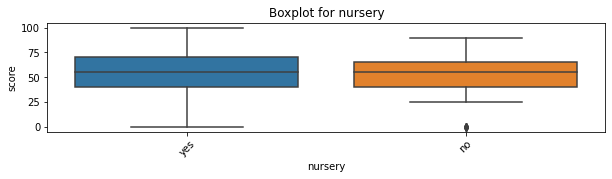

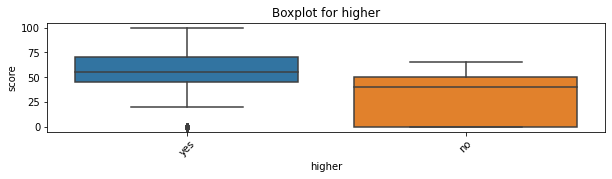

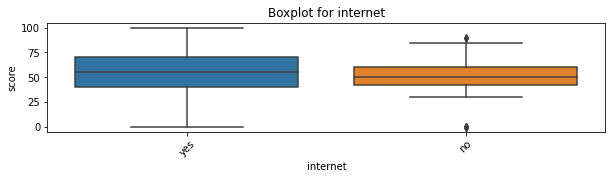

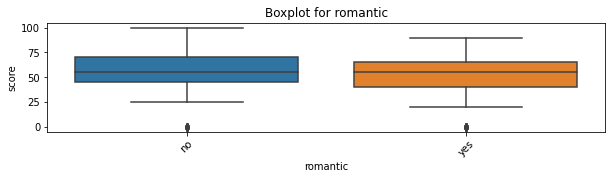

In [76]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 2))
    sns.boxplot(x=column, y='score', 
                data = students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob',\
            'reason','guardian','schoolsup','famsup','paid','activities','nursery',\
           'higher','internet','romantic']:
    get_boxplot(col)
    
    # Каждый колонка может влиять на оценку.

In [77]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # поправка Бонферони.
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob',\
            'reason','guardian','schoolsup','famsup','paid','activities','nursery',\
           'higher','internet','romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [78]:
# Для будущей модели будем использовать параметры колонок: Mjob, age, Medu,
# Fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences. 
# Эти колонки могут повлиять на результат оценки
#Слишком много NaN, могло быть лучше.

stud_model = students.loc[:,['Mjob','age','Medu','Fedu','traveltime',\
                         'studytime','failures','famrel','freetime',\
                         'goout','health','absences']]
stud_model.head()

,Mjob,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences
0,at_home,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0
1,at_home,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0
2,at_home,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0
3,health,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0
4,other,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0
